Lambda School Data Science

*Unit 2, Sprint 3, Module 4*

---


# Model Interpretation

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your work.

- [ ] Continue to iterate on your project: data cleaning, exploratory visualization, feature engineering, modeling. *Check*
- [ ] Make at least 1 partial dependence plot to explain your model. *Check*
- [ ] Make at least 1 Shapley force plot to explain an individual prediction. *Check*
- [ ] **Share at least 1 visualization (of any type) on Slack!** *Check*

# Please skip to BUILD PDP MODEL AND VISUALISATIONS below

**For the last few assignments I've been building on each one instead of starting from scratch for each one.  It needs a little cleaning I know, but I think I've got everything in, some of the stretch goals still need to be done, thanks again for your help.  Can pdp be done in a pipeline at all?**

If you aren't ready to make these plots with your own dataset, you can practice these objectives with any dataset you've worked with previously. Example solutions are available for Partial Dependence Plots with the Tanzania Waterpumps dataset, and Shapley force plots with the Titanic dataset. (These datasets are available in the data directory of this repository.)

Please be aware that **multi-class classification** will result in multiple Partial Dependence Plots (one for each class), and multiple sets of Shapley Values (one for each class).

## Reading

Top recommendations in _**bold italic:**_

#### Permutation Importances
- _**[Kaggle / Dan Becker: Machine Learning Explainability](https://www.kaggle.com/dansbecker/permutation-importance)**_
- [Christoph Molnar: Interpretable Machine Learning](https://christophm.github.io/interpretable-ml-book/feature-importance.html)

#### (Default) Feature Importances
  - [Ando Saabas: Selecting good features, Part 3, Random Forests](https://blog.datadive.net/selecting-good-features-part-iii-random-forests/)
  - [Terence Parr, et al: Beware Default Random Forest Importances](https://explained.ai/rf-importance/index.html)

#### Gradient Boosting
  - [A Gentle Introduction to the Gradient Boosting Algorithm for Machine Learning](https://machinelearningmastery.com/gentle-introduction-gradient-boosting-algorithm-machine-learning/)
  - [An Introduction to Statistical Learning](http://www-bcf.usc.edu/~gareth/ISL/ISLR%20Seventh%20Printing.pdf), Chapter 8
  - _**[Gradient Boosting Explained](https://www.gormanalysis.com/blog/gradient-boosting-explained/)**_ — Ben Gorman
  - [Gradient Boosting Explained](http://arogozhnikov.github.io/2016/06/24/gradient_boosting_explained.html) — Alex Rogozhnikov
  - [How to explain gradient boosting](https://explained.ai/gradient-boosting/) — Terence Parr & Jeremy Howard

## Stretch Goals

#### Partial Dependence Plots
- [ ] Make multiple PDPs with 1 feature in isolation. *Check*
- [ ] Make multiple PDPs with 2 features in interaction. *Check*
- [ ] Use Plotly to make a 3D PDP. 
- [ ] Make PDPs with categorical feature(s). Use Ordinal Encoder, outside of a pipeline, to encode your data first. If there is a natural ordering, then take the time to encode it that way, instead of random integers. Then use the encoded data with pdpbox. Get readable category names on your plot, instead of integer category codes.*Check*

#### Shap Values
- [ ] Make Shapley force plots to explain at least 4 individual predictions.
    - If your project is Binary Classification, you can do a True Positive, True Negative, False Positive, False Negative.*I did not understand this one, a Confusion Matrix?*
    - If your project is Regression, you can do a high prediction with low error, a low prediction with low error, a high prediction with high error, and a low prediction with high error.
- [ ] Use Shapley values to display verbal explanations of individual predictions.
- [ ] Use the SHAP library for other visualization types.

The [SHAP repo](https://github.com/slundberg/shap) has examples for many visualization types, including:

- Force Plot, individual predictions
- Force Plot, multiple predictions
- Dependence Plot
- Summary Plot
- Summary Plot, Bar
- Interaction Values
- Decision Plots

We just did the first type during the lesson. The [Kaggle microcourse](https://www.kaggle.com/dansbecker/advanced-uses-of-shap-values) shows two more. Experiment and see what you can learn!

In [290]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/jraval/Unit2BuildProjectLambda/main/'
    !pip install category_encoders==2.*
    !pip install pandas-profiling==2.*

# If you're working locally:
else:
    DATA_PATH = '../data/'

In [291]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [292]:
import io
from io import BytesIO
!pip install zipfile36

In [293]:
import zipfile

In [294]:
!pip install xgboost

In [295]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


# **Boosting and Permutation Importance**

- Use XGBoost for **gradient boosting**
- Get **permutation importances** for model interpretation and feature selection 

## **Wrangle Data**

In [296]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import category_encoders as ce 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px



In [297]:
def wrangle(X):
    #Make a copy
    X = X.copy()
    #Drop high cardinality features
    high_card_cols = [col for col in X.select_dtypes('object').columns
                    if X[col].nunique() > 100]
    X.drop(columns = high_card_cols, inplace=True)
    
    return X

In [298]:
# Read in data from your Build Week Dataset
fall_url = 'https://raw.githubusercontent.com/jraval/Unit2BuildProjectLambda/main/KaggleFallDetection_2_8_21.csv'



#df = pd.io.parsers.read_csv(fall_url, dtype={'https://github.com/jraval/Unit2BuildProjectLambda/blob/main/KaggleFallDetection_2_8_21_3.csv': 'str'})

In [299]:
df = pd.read_csv(fall_url)

In [300]:
df.head()

ACTIVITY     TIME        SL      EEG  BP   HR  CIRCLUATION
0         3  4722.92   4019.64 -1600.00  13   79          317
1         2  4059.12   2191.03 -1146.08  20   54          165
2         2  4773.56   2787.99 -1263.38  46   67          224
3         4  8271.27   9545.98 -2848.93  26  138          554
4         4  7102.16  14148.80 -2381.15  85  120          809

Your code starts here:

In [301]:
# Change column names: replace spaces with underscores
df.rename(columns={'CIRCLUATION':'CIRCULATION'}, inplace=True)

# EDA

(7.0, 0.0)

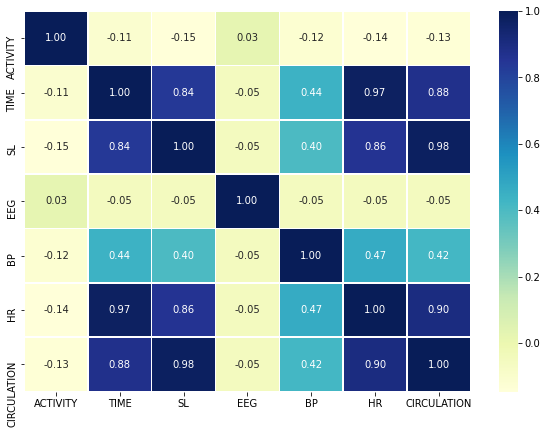

In [302]:
#I like this better than the correlation matrix in Pandas Profiling
#There are three correlation matrices in this notebook, the question is why

import seaborn as sns#EDA - determine which columns to drop, there was overfitting in train set

corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(10, 7))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim()

In [303]:
# Get Pandas Profiling Report
import pandas as pd
import pandas_profiling

pandas_profiling.ProfileReport(df)

### Choose your target 

Which column in your tabular dataset will you predict?

I picked incidence of falls as my target because that is what the study was measuring, can we predict falling?

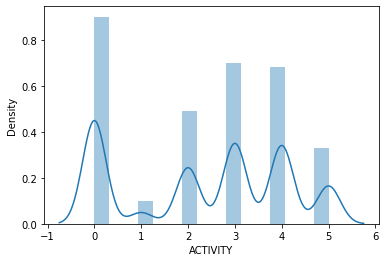

In [304]:
import seaborn as sns #There is no clear majority
import matplotlib.pyplot as plt
sns.distplot(df['ACTIVITY']);

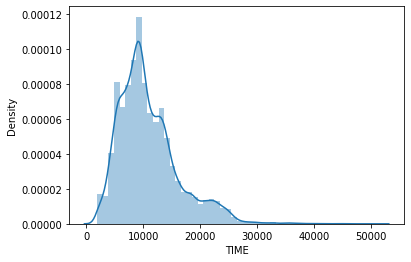

In [305]:
sns.distplot(df['TIME'], kde=True);#Time is skewed

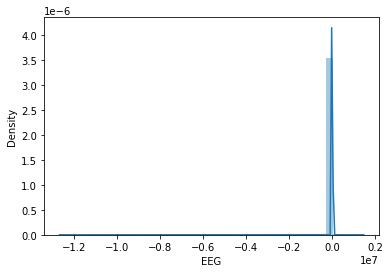

In [306]:
sns.distplot(df['EEG'], kde=True);

The Key for values

0- Standing
1- Walking
2- Sitting
3- Falling
4- Cramps
5- Running

In [307]:
y = df['ACTIVITY']#As we can see there is no clear majority class, standing has the largest plurality
y.nunique()
y.value_counts(normalize=True)

0    0.281284
3    0.219021
4    0.213283
2    0.152729
5    0.103040
1    0.030643
Name: ACTIVITY, dtype: float64

In [308]:
df.columns

Index(['ACTIVITY', 'TIME', 'SL', 'EEG', 'BP', 'HR', 'CIRCULATION'], dtype='object')

In [309]:
# Add an OLS (Ordinary Least Squares) trendline,
# to see how the outliers influence the "line of best fit"
import plotly.express as px


In [310]:
px.scatter(df, x= 'SL', y='CIRCULATION', trendline='ols')

In [311]:
df=df.fillna('Missing') #I may get rid of this line when I add an imputer

# Pick Target, begin feature selection

In [312]:
df['FALLS'] = df['ACTIVITY']  #I'm expecting overfitting if I use these features because they were part of the same column, these features are essentially tied together.
df['STANDING'] = df['ACTIVITY']
df['WALKING'] = df['ACTIVITY']
df['SITTING'] = df['ACTIVITY']
df['CRAMPS'] = df['ACTIVITY']
df['RUNNING'] = df['ACTIVITY']

In [313]:
df = df.replace({'FALLS':{3:1, 1:0, 2:0, 4:0, 5:0}})
df = df.replace({'STANDING':{0:1, 1:0, 2:0, 3:0, 4:0, 5:0}})
df = df.replace({'WALKING':{2:0, 3:0, 4:0, 5:0}})
df = df.replace({'SITTING':{1:0, 2:1, 3:0, 4:0, 5:0,}})
df = df.replace({'CRAMPS':{1:0, 2:0, 3:0, 4:1, 5:0}})
df = df.replace({'RUNNING':{1:0, 2:0, 3:0, 4:0, 5:1}})

In [314]:
build_df = df

In [315]:
px.scatter(build_df, x= 'BP', y='FALLS', trendline='ols')

In [316]:
target = 'FALLS'

(13.0, 0.0)

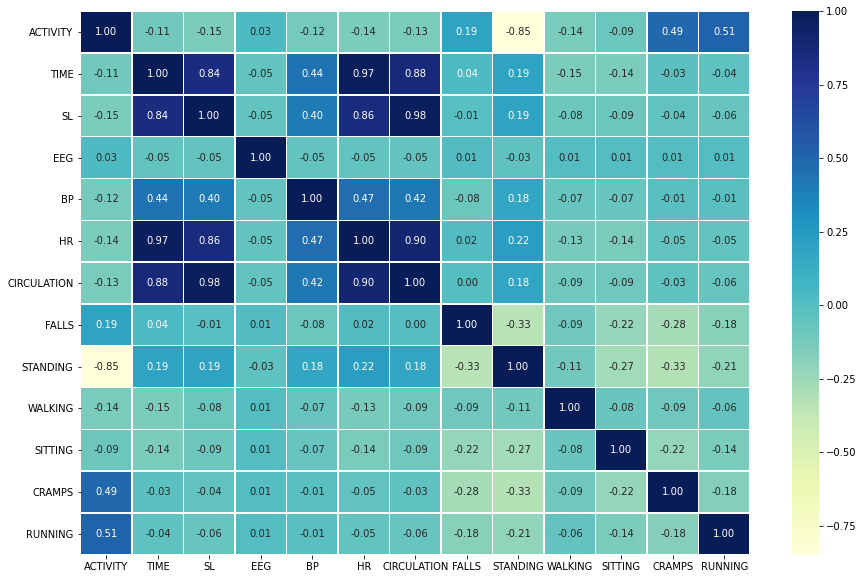

In [317]:
#EDA - determine which columns to drop, there was overfitting in train set
corr_matrix = build_df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim()

In [318]:
from scipy.stats import chi2_contingency
import numpy as np




def cramers_V(var1,var2) :
  crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
  stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
  obs = np.sum(crosstab) # Number of observations
  mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
  return (stat/(obs*mini))

In [319]:
#Using Cramer's V we still see a high correlation between sugar load and circulation

SL_var = df['SL']
CIRCULATION_var = df['CIRCULATION']

cramers_V(SL_var, CIRCULATION_var)

0.9887025655258034

In [ ]:
cramers_V()

In [216]:
build_df = build_df.drop(columns=['ACTIVITY', 'WALKING', 'SITTING', 'CRAMPS', 'RUNNING', 'STANDING', 'TIME'])
build_df_2 = df.drop(columns=['ACTIVITY', 'WALKING', 'SITTING', 'CRAMPS', 'RUNNING', 'STANDING'])

(6.0, 0.0)

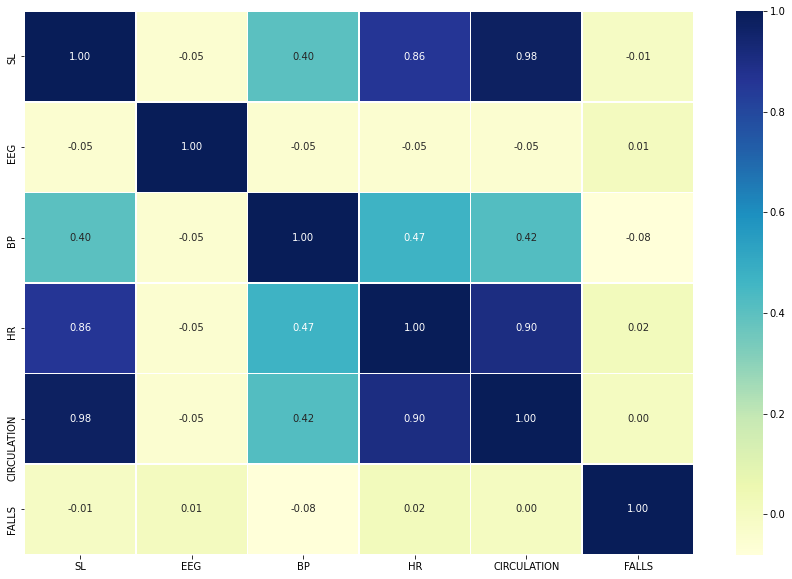

In [217]:
import seaborn as sns #EDA - determine which columns to drop, there was overfitting in train set, circulation should be dropped but I'm leaving it for now.

corr_matrix = build_df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim()

#Split Train, Val, Test, Create Feature Matrix and Target

In [218]:
%matplotlib inline
import category_encoders as ce
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [185]:
#build_df = wrangle(build_df)

In [219]:
# Split train into train & test. Make val the same size as test.
target = 'FALLS'
train, test = train_test_split(build_df, test_size=0.2,  
                              stratify=build_df[target], random_state=42)

In [220]:
train, val = train_test_split(train, test_size=len(test),  
                              stratify=train[target], random_state=42)

In [221]:
val.head()

SL      EEG   BP   HR  CIRCULATION  FALLS
8064     4160.77 -1511.60  111   88          318      1
14793    2634.00 -1846.00   15   62          202      0
31     161030.00 -8830.00   91  388         6290      0
3155   126948.00 -8516.00  137  316         4916      0
755     21169.00 -2864.42   80  145         1156      0

In [222]:
test.head()

SL       EEG  BP   HR  CIRCULATION  FALLS
15372   13613.9  -1470.78  17   96          804      0
4668   299501.0 -10100.00  99  537         8350      1
2015    59527.6  -4760.00  35  215         2188      1
14274   16838.0  -3341.00  36  159          974      0
274     79842.1  -7020.00  42  272         3539      1

In [223]:
train.shape, val.shape, test.shape

((9828, 6), (3277, 6), (3277, 6))

In [224]:
# Arrange data into X features matrix and y target vector
X_train = train.drop(columns=target)
y_train = train[target]
X_val = val.drop(columns=target)
y_val = val[target]
X_test = test.drop(columns=target)
y_test = test[target]


In [225]:
X_train.columns


Index(['SL', 'EEG', 'BP', 'HR', 'CIRCULATION'], dtype='object')

# Baseline Accuracy


In [226]:
y_train.value_counts(normalize=True).max()


0.7810337810337811

# Build Model


In [256]:
from category_encoders import OrdinalEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from xgboost import XGBClassifier
from xgboost import XGBRFClassifier
from category_encoders import OneHotEncoder

In [228]:
model_skgb = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    GradientBoostingClassifier(random_state=42)
)

model_skgb.fit(X_train, y_train);

In [286]:

model_xgb = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    XGBClassifier(n_estimators=100,
                  random_state=42,
                  max_depth = 5,
                  eval_metric='merror',
                  n_jobs=11)
)

In [254]:
#eval_set = [(X_val, y_val)]
#model_xgb = make_pipeline(
#    OrdinalEncoder(),
#    SimpleImputer(),
#    XGBClassifier(n_estimators=400,
#                  random_state=42, 
#                  eval_set=eval_set,
#                  eval_metric='merror',
#                  early_stopping_rounds=10,
#                  verbose=True,
#                  n_jobs=11)
#)

In [287]:
model_xgb.fit(X_train, y_train);

# BUILD MODEL FOR PDP PLOT and VISUALIZATIONS

In [259]:
import category_encoders as ce

from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer


encoder = ce.OrdinalEncoder()
imputer = SimpleImputer()
scaler = StandardScaler()
model_shap = RandomForestClassifier()

X_train_encoded = encoder.fit_transform(X_train)
X_train_imputed = imputer.fit_transform(X_train_encoded)
X_train_scaled = scaler.fit_transform(X_train_imputed)
model_shap.fit(X_train_scaled, y_train)

X_val_encoded = encoder.transform(X_val)
X_val_imputed = imputer.transform(X_val_encoded)
X_val_scaled = scaler.transform(X_val_imputed)
print('Validation Accuracy', model_shap.score(X_val_scaled, y_val))

X_test_encoded = encoder.transform(X_test)
X_test_imputed = imputer.transform(X_test_encoded)
X_test_scaled = scaler.transform(X_test_imputed)
y_pred = model_shap.predict(X_test_scaled)

Validation Accuracy 0.8605431797375649


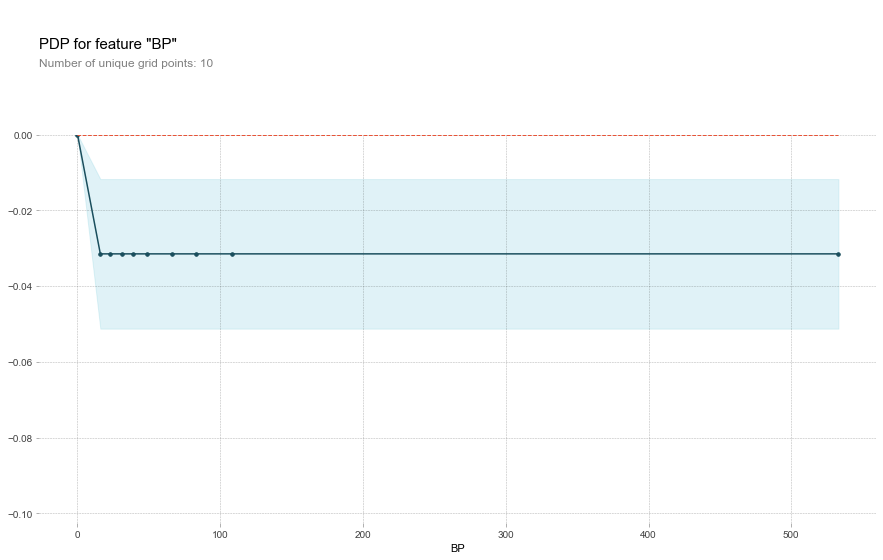

In [260]:
from pdpbox.pdp import pdp_isolate, pdp_plot

feature = 'BP'

#Isolate

isolated = pdp_isolate(
    model=model_shap,
    dataset=X_test, # <--- Always use validation or test data
    model_features=X_test.columns,
    feature=feature,
    #num_grid_points=50
    
)

pdp_plot(isolated, feature_name=feature);

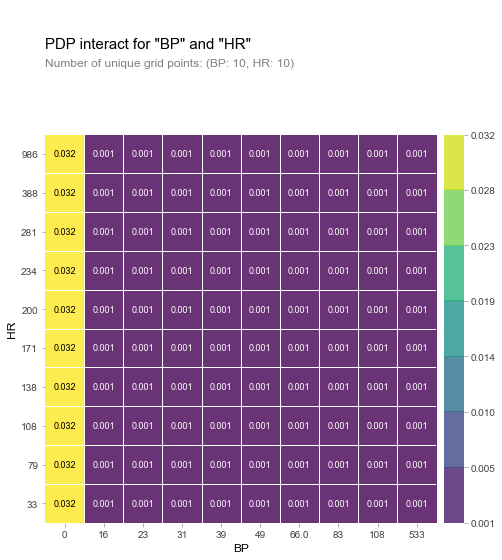

In [261]:
from pdpbox.pdp import pdp_interact, pdp_interact_plot

features =['BP', 'HR']

interact = pdp_interact(
    model = model_shap,
    dataset=X_test,
    model_features=X_test.columns,
    features=features
)

pdp_interact_plot(interact, plot_type='grid', feature_names=features);

In [263]:
# Grab a single observation of test data

row = X_train.iloc[[2]]

row

SL      EEG   BP   HR  CIRCULATION
1077  142646.0 -6213.24  167  308         6057

In [264]:
# Grab a single observation of test data

row = X_train.iloc[[0]]

row

SL     EEG  BP  HR  CIRCULATION
9356  5357.97 -2080.0  16  79          292

In [265]:
model_shap.predict(row)

array([0], dtype=int64)

In [266]:
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from xgboost import XGBClassifier

processor = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median')
)

X_train_processed = processor.fit_transform(X_train)
X_val_processed = processor.transform(X_val)

eval_set = [(X_train_processed, y_train), 
            (X_val_processed, y_val)]

model = XGBClassifier(n_estimators=1000, n_jobs=-1)
model.fit(X_train_processed, y_train, eval_set=eval_set, eval_metric='auc', 
          early_stopping_rounds=10)

[0]	validation_0-auc:0.79512	validation_1-auc:0.77093
[1]	validation_0-auc:0.82239	validation_1-auc:0.79372
[2]	validation_0-auc:0.83220	validation_1-auc:0.80058
[3]	validation_0-auc:0.84574	validation_1-auc:0.81406
[4]	validation_0-auc:0.85951	validation_1-auc:0.82350
[5]	validation_0-auc:0.86569	validation_1-auc:0.83008
[6]	validation_0-auc:0.87078	validation_1-auc:0.83517
[7]	validation_0-auc:0.87197	validation_1-auc:0.83695
[8]	validation_0-auc:0.87597	validation_1-auc:0.84260
[9]	validation_0-auc:0.88172	validation_1-auc:0.84884
[10]	validation_0-auc:0.88391	validation_1-auc:0.85205
[11]	validation_0-auc:0.88485	validation_1-auc:0.85168
[12]	validation_0-auc:0.88929	validation_1-auc:0.85730
[13]	validation_0-auc:0.89307	validation_1-auc:0.86002
[14]	validation_0-auc:0.90301	validation_1-auc:0.86961
[15]	validation_0-auc:0.90479	validation_1-auc:0.87194
[16]	validation_0-auc:0.90748	validation_1-auc:0.87239
[17]	validation_0-auc:0.90876	validation_1-auc:0.87173
[18]	validation_0-au

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=-1, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [267]:
# STUDY/PRACTICE THIS CELL FOR THE SPRINT CHALLENGE

!pip install shap
import shap

explainer = shap.TreeExplainer(model)
row_processed = processor.transform(row)
shap_values = explainer.shap_values(row_processed)

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value, 
    shap_values=shap_values, 
    features=row, 
    link='logit' # For classification, this shows predicted probabilities
)

# **Check Metrics**

In [238]:
#FOR SPRINT CHALLENGE - DISREGARD
from sklearn.metrics import roc_auc_score
X_test_processed = processor.transform(X_test)
class_index = 1
y_pred_proba = model.predict_proba(X_test_processed)[:, class_index]
print(f'Test ROC AUC for class {class_index}:')
print(roc_auc_score(y_test, y_pred_proba)) # Ranges from 0-1, higher is better

Test ROC AUC for class 1:
0.9017830999008359


In [268]:
print('sklearn Training Accuracy:', model_skgb.score(X_train, y_train))
print('sklearn Val Accuracy:', model_skgb.score(X_val, y_val))

sklearn Training Accuracy: 0.8234635734635735
sklearn Val Accuracy: 0.812938663411657


In [289]:
print('sklearn Training Accuracy:', model_xgb.score(X_train, y_train))
print('sklearn Val Accuracy:', model_xgb.score(X_val, y_val))

sklearn Training Accuracy: 0.9087301587301587
sklearn Val Accuracy: 0.8480317363442172


# **Communicate Results**

- How can we determine or communicate which features are most important to our model when making predictions.

**Option 1 Grab feature importances from our pipeline**

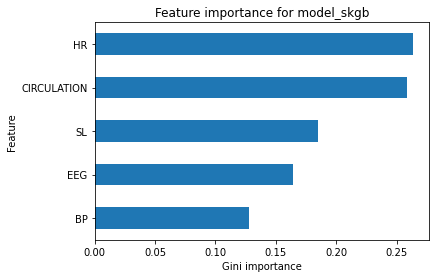

In [56]:
importances = model_skgb.named_steps['gradientboostingclassifier'].feature_importances_

feat_imp = pd.Series(importances, index=X_train.columns).sort_values()
feat_imp.tail(10).plot(kind='barh')
plt.xlabel('Gini importance')
plt.ylabel('Feature')
plt.title('Feature importance for model_skgb');

**Option 2** Drop column importance
- Good, but computationally expensive, because you have to train a model for each feature

In [57]:
#Step 1 - Train a model for a feature we want to evaluate
feature = 'CIRCULATION'
feature_2 = 'HR'
feature_3 = 'SL'
feature_4 = 'EEG'
feature_5 = 'BP'

model_w_feat =  make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    XGBClassifier(n_estimators=10,
                  random_state=42, 
                  n_jobs=-1)
)

In [58]:
model_w_feat.fit(X_train, y_train);

[11:07:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [59]:
print(f'TrainAccuracy w {feature} included: ',model_w_feat.score(X_train, y_train))

TrainAccuracy w CIRCULATION included:  0.8283475783475783


In [60]:
print(f'ValAccuracy w {feature} included: ', model_w_feat.score(X_val, y_val)) #Use validation data

ValAccuracy w CIRCULATION included:  0.8111077204760452


In [95]:
#Step 2 - Train model without feature included
model_wo_feat =  make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    XGBClassifier(n_estimators=10,
                  random_state=42, 
                  n_jobs=-1)
)

model_wo_feat.fit(X_train.drop(columns=feature), y_train)


[11:11:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('ordinalencoder', OrdinalEncoder(cols=[], mapping=[])),
                ('simpleimputer', SimpleImputer()),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=10,
                               n_jobs=-1, num_parallel_tree=1, random_state=42,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               subsample=1, tree_method='exact',
                               validate_parameters=1, verbosity=None

In [96]:
print(f'TrainAccuracy wo "{feature}"  not included: ', model_wo_feat.score(X_train.drop(columns=feature), y_train))

print(f'ValAccuracy wo "{feature}" not included: ', model_wo_feat.score(X_val.drop(columns=feature), y_val))

TrainAccuracy wo "CIRCULATION"  not included:  0.8363858363858364
ValAccuracy wo "CIRCULATION" not included:  0.8123283490997864


In [97]:
model_wo_feat.fit(X_train.drop(columns=feature_2), y_train)
print(f'TrainAccuracy wo "{feature_2}"  not included: ', model_wo_feat.score(X_train.drop(columns=feature_2), y_train))
print(f'ValAccuracy wo "{feature_2}" not included: ', model_wo_feat.score(X_val.drop(columns=feature_2), y_val))

model_wo_feat.fit(X_train.drop(columns=feature_3), y_train)
print(f'TrainAccuracy wo "{feature_3}"  not included: ', model_wo_feat.score(X_train.drop(columns=feature_3), y_train))
print(f'ValAccuracy wo "{feature_3}" not included: ', model_wo_feat.score(X_val.drop(columns=feature_3), y_val))

model_wo_feat.fit(X_train.drop(columns=feature_4), y_train)
print(f'TrainAccuracy wo "{feature_4}"  not included: ', model_wo_feat.score(X_train.drop(columns=feature_4), y_train))
print(f'ValAccuracy wo "{feature_4}" not included: ', model_wo_feat.score(X_val.drop(columns=feature_4), y_val))

model_wo_feat.fit(X_train.drop(columns=feature_5), y_train)
print(f'TrainAccuracy wo "{feature_5}"  not included: ', model_wo_feat.score(X_train.drop(columns=feature_5), y_train))
print(f'ValAccuracy wo "{feature_5}" not included: ', model_wo_feat.score(X_val.drop(columns=feature_5), y_val))

[11:15:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
TrainAccuracy wo "HR"  not included:  0.8267195767195767
ValAccuracy wo "HR" not included:  0.8108025633201098
[11:15:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
TrainAccuracy wo "SL"  not included:  0.8265160765160765
ValAccuracy wo "SL" not included:  0.8126335062557217
[11:15:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric

**Option 3 - Permutation Importance**

In [63]:
from numpy.random import permutation

#Our feature will still be 'CIRCULATION'

#Step 1 - Train the model on the whole dataset

feature = 'CIRCULATION'

model_xgb =  make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    XGBClassifier(n_estimators=10,
                  random_state=42, 
                  n_jobs=-1)
)

model_xgb.fit(X_train, y_train)

#Step 2: Evaluate using the validation set
print('Validation Accuracy', model_xgb.score(X_val, y_val))


[11:07:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Validation Accuracy 0.8111077204760452


In [64]:
#In our Validation set, we're going to permute the feature we selected

X_val_perm = X_val.copy()
X_val_perm[feature] = permutation(X_val[feature])

In [65]:
X_val[feature].head()

8064      318
14793     202
31       6290
3155     4916
755      1156
Name: CIRCULATION, dtype: int64

In [66]:
#Step 4 - Calculate the error metric with permuted data

print(f'Validation Accuracy with {feature} permuted', model_xgb.score(X_val_perm, y_val))

Validation Accuracy with CIRCULATION permuted 0.790051876716509


In [67]:
from sklearn.inspection import permutation_importance

perm_imp = permutation_importance(model_xgb,
                                   X_val,
                                   y_val,
                                   n_jobs=1,
                                   random_state=42)

In [68]:
type(perm_imp)

sklearn.utils.Bunch

In [69]:
perm_imp.keys()

dict_keys(['importances_mean', 'importances_std', 'importances'])

In [70]:
data = {'importances_mean' : perm_imp['importances_mean'], 'importances_std': perm_imp['importances_std']}

In [71]:
df = pd.DataFrame(data, index=X_val.columns)
df.sort_values(by='importances_mean',inplace=True)

In [72]:
df

importances_mean  importances_std
BP                   0.009216         0.002073
SL                   0.016295         0.002937
CIRCULATION          0.023924         0.002321
EEG                  0.029173         0.002678
HR                   0.036924         0.002300

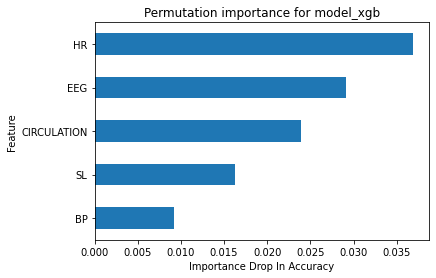

In [73]:
df['importances_mean'].tail(10).plot(kind='barh')
plt.xlabel('Importance Drop In Accuracy')
plt.ylabel('Feature')
plt.title('Permutation importance for model_xgb');

# Random Forest and Decision Tree modeling
 - pipeline = RandomForest
 - model = DecisionClassifier

In [74]:
pipeline = make_pipeline(
    ce.OneHotEncoder(), 
    SimpleImputer(strategy='mean'), 
    RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, max_depth=10, max_leaf_nodes=500)
)#Random Forest pipeline/model

In [75]:
model = make_pipeline(
    ce.OneHotEncoder(),
    SimpleImputer(strategy='median'),  
    DecisionTreeClassifier(max_depth=11)
)#Decision Tree Model


In [76]:
pipeline.fit(X_train, y_train)


Pipeline(steps=[('onehotencoder', OneHotEncoder(cols=[])),
                ('simpleimputer', SimpleImputer()),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=10, max_leaf_nodes=500,
                                        n_jobs=-1, random_state=42))])

In [77]:
model.fit(X_train, y_train)



Pipeline(steps=[('onehotencoder', OneHotEncoder(cols=[])),
                ('simpleimputer', SimpleImputer(strategy='median')),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=11))])

# Metrics 
- Random Forest -1
- Decision Tree -2

In [78]:
print('Train Accuracy', pipeline.score(X_train, y_train)) #Train initially had leakage but I changed the max_depth
#Random Forest

Train Accuracy 0.8754578754578755


In [79]:
print('Validation Accuracy', pipeline.score(X_val, y_val))#RF

Validation Accuracy 0.8230088495575221


In [80]:
print('Test Accuracy', pipeline.score(X_test, y_test))#RF


Test Accuracy 0.8471162648764113


In [81]:
print('Train Accuracy', model.score(X_train, y_train))#Decision Tree

Train Accuracy 0.8948921448921449


In [82]:
print('Val Accuracy', model.score(X_val, y_val))#DT

Val Accuracy 0.8306377784559048


In [83]:
print('Test Accuracy', model.score(X_test, y_test))#DT

Test Accuracy 0.8272810497406164


# Baseline

In [84]:
y_test.value_counts(normalize=True).max(), y_val.value_counts(normalize=True).max()

(0.7808971620384498, 0.7808971620384498)

# Confusion Matrix

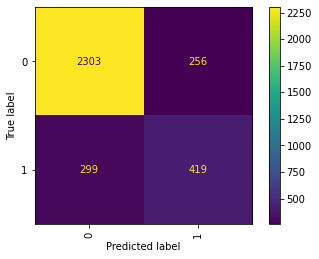

In [85]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, X_val, y_val, values_format='.0f', xticks_rotation='vertical');

# ROC-AUC Score probability for the last class

In [86]:
from sklearn.metrics import roc_auc_score
y_pred_proba = model.predict_proba(X_val)[:,-1] # probability for the last class 
print('Val Score Decision Tree:', roc_auc_score(y_val, y_pred_proba))


Val Score Decision Tree: 0.8442291176153639


In [87]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)

In [88]:
#See the details in a table
pd.DataFrame({
    'False Positive Rate': fpr,
    'True Positive Rate': tpr,
    'Threshold': thresholds 
})

False Positive Rate  True Positive Rate  Threshold
0              0.000000            0.000000   2.000000
1              0.022274            0.174095   1.000000
2              0.023447            0.193593   0.952381
3              0.023447            0.204735   0.937500
4              0.023447            0.210306   0.900000
..                  ...                 ...        ...
93             0.368503            0.896936   0.021277
94             0.376710            0.896936   0.020000
95             0.400938            0.901114   0.005556
96             0.433763            0.902507   0.003690
97             1.000000            1.000000   0.000000

[98 rows x 3 columns]

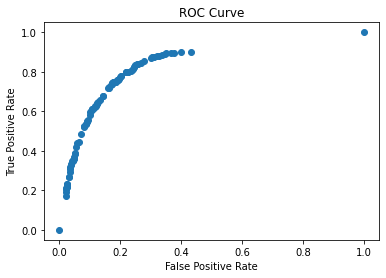

In [89]:
#See the details in a plot
#This is the Receiver Operating Characteristic curve
plt.scatter(fpr, tpr)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate');

In [90]:
from sklearn.metrics import roc_auc_score
y_pred_proba = pipeline.predict_proba(X_val)[:,-1] # probability for the last class 
print('Val Score Random Forest:', roc_auc_score(y_val, y_pred_proba))


Val Score Random Forest: 0.8898216573544028


# Quick EDA on target


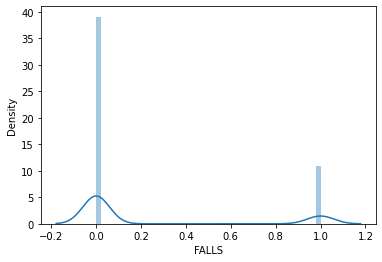

In [91]:
y = build_df['FALLS']
sns.distplot(y);
